# Sprint
## アンサンブル学習
スクラッチでアンサンブル学習の各種手法を実装していきます。


3種類のアンサンブル学習をスクラッチ実装していきます。そして、それぞれの効果を小さめのデータセットで確認します。


- ブレンディング
- バギング
- スタッキング

## 小さなデータセットの用意
以前も利用した回帰のデータセットを用意します。


[House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)


この中のtrain.csvをダウンロードし、目的変数としてSalePrice、説明変数として、GrLivAreaとYearBuiltを使います。


train.csvを学習用（train）8割、検証用（val）2割に分割してください。

# 【問題1】
## ブレンディングのスクラッチ実装
**ブレンディング**をスクラッチ実装し、単一モデルより精度があがる例を**最低3つ**示してください。精度があがるとは、検証用データに対する平均二乗誤差（MSE）が小さくなることを指します。
## ブレンディングとは
ブレンディングとは、N個の多様なモデルを独立して学習させ、推定結果を重み付けした上で足し合わせる方法です。最も単純には平均をとります。多様なモデルとは、以下のような条件を変化させることで作り出すものです。


- 手法（例：線形回帰、SVM、決定木、ニューラルネットワークなど）
- ハイパーパラメータ（例：SVMのカーネルの種類、重みの初期値など）
- 入力データの前処理の仕方（例：標準化、対数変換、PCAなど）

重要なのはそれぞれのモデルが大きく異なることです。


回帰問題でのブレンディングは非常に単純であるため、scikit-learnには用意されていません。


**《補足》**


分類問題の場合は、多数決を行います。回帰問題に比べると複雑なため、scikit-learnにはVotingClassifierが用意されています。


[sklearn.ensemble.VotingClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('train.csv')
display(data)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
# 数値列を利用
data_num = data.select_dtypes(include='number')
print(data_num.isnull().sum()[data_num.isnull().sum() > 0].sort_values(ascending=False))
data_num.info()

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-nu

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data_num.iloc[:, 1:-1].fillna(method = 'bfill').fillna(method = 'ffill').values
y = data_num['SalePrice'].values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)

y_train_log = np.log(y_train)
y_valid_log = np.log(y_valid)

In [4]:
print(y_train)
print(y_train_log)

[107500 160000 145000 ... 112000 234000 221000]
[11.58524613 11.98292909 11.88448902 ... 11.62625415 12.36307639
 12.30591798]


### ブレンディング検証: 1. 線形回帰\*w1 + SVM\*w2 + 決定木\*w3

In [5]:
# 単一モデル検証: 線形回帰
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train_std, y_train_log)
y_pred_log = lr.predict(X_valid_std)
mse_lr = mean_squared_error(y_valid_log, y_pred_log)
print(f'MSE(Linear Regression): {mse_lr}')

MSE(Linear Regression): 0.03629917716266756


In [6]:
# 単一モデル検証: SVM
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_std, y_train_log)
y_pred_log = svr.predict(X_valid_std)
mse_svr = mean_squared_error(y_valid_log, y_pred_log)
print(f'MSE(SVR): {mse_svr}')

MSE(SVR): 0.026533348225285452


In [7]:
# 単一モデル検証: 決定木
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train_std, y_train_log)
y_pred_log = dtree.predict(X_valid_std)
mse_dtree = mean_squared_error(y_valid_log, y_pred_log)
print(f'MSE(Decision Tree): {mse_dtree}')

MSE(Decision Tree): 0.04222881167357243


In [8]:
# 単一検証で利用した学習済みモデルを流用
w = np.array([3, 9, 1])
y_pred_brend_1 = np.concatenate((dtree.predict(X_valid_std).reshape(-1, 1)*w[0],
                                svr.predict(X_valid_std).reshape(-1, 1)*w[1],
                                dtree.predict(X_valid_std).reshape(-1, 1)*w[2]), axis=1)
y_pred_brend_1 = np.sum(y_pred_brend_1, axis=1) / np.sum(w)
print(f'MSE(Brending 1): {mean_squared_error(y_valid_log, y_pred_brend_1)}')

MSE(Brending 1): 0.021206104870758552


In [9]:
print(y_valid[:10])
print(np.exp(y_pred_brend_1[:10]))

[200624 133000 110000 192000  88000  85000 282922 141000 745000 148800]
[176794.92042778 161602.50597209 102400.89735024 204688.89842026
  99350.79011568 102124.51229709 261658.33326506 139920.92134353
 284748.60417763 158178.62513793]


単一検証の精度に対応した重みをかけ加重平均をとった。

結果、単一検証に比べてより良い結果を得ることができた。

### ブレンディング検証: 2. SVM kernel = {'linear', 'poly', 'rbf', 'sigmoid'} 
SVMの4種類のカーネルを用いて検証を行う

In [10]:
# 単一モデル検証: kernel='linear'
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train_std, y_train_log)
y_pred_log = svr_linear.predict(X_valid_std)
print(f'MSE(kernel=\'linear\'): {mean_squared_error(y_valid_log, y_pred_log)}')

MSE(kernel='linear'): 0.04247592793306076


In [11]:
# 単一モデル検証: kernel='poly'(degree=2)
svr_poly = SVR(kernel='poly', degree=2)
svr_poly.fit(X_train_std, y_train_log)
y_pred_log = svr_poly.predict(X_valid_std)
print(f'MSE(kernel=\'poly\'): {mean_squared_error(y_valid_log, y_pred_log)}')

MSE(kernel='poly'): 0.40154505662867035


In [12]:
# 単一モデル検証: kernel='rbf'
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train_std, y_train_log)
y_pred_log = svr_rbf.predict(X_valid_std)
print(f'MSE(kernel=\'rbf\'): {mean_squared_error(y_valid_log, y_pred_log)}')

MSE(kernel='rbf'): 0.026533348225285452


In [13]:
# 単一モデル検証: kernel='sigmoid'
svr_sigmoid = SVR(kernel='sigmoid')
svr_sigmoid.fit(X_train_std, y_train_log)
y_pred_log = svr_sigmoid.predict(X_valid_std)
print(f'MSE(kernel=\'sigmoid\'): {mean_squared_error(y_valid_log, y_pred_log)}')

MSE(kernel='sigmoid'): 41.921988032560485


In [14]:
# ブレンディング検証: kernel = {'linear', 'poly', 'rbf', 'sigmoid'} 
w = np.array([300, 50, 200, 1])
y_pred_brend_2 = np.concatenate((
    svr_linear.predict(X_valid_std).reshape(-1, 1)*w[0],
    svr_poly.predict(X_valid_std).reshape(-1, 1)*w[1],
    svr_rbf.predict(X_valid_std).reshape(-1, 1)*w[2],
    svr_sigmoid.predict(X_valid_std).reshape(-1, 1)*w[3]
), axis=1)
y_pred_brend_2 = np.sum(y_pred_brend_2, axis=1) / np.sum(w)
print(np.exp(y_pred_brend_2[:10]))
print(y_valid[:10])
print(f'MSE(Brending 2): {mean_squared_error(y_valid_log, y_pred_brend_2)}')

[195775.49693948 157723.79204684 105388.96407001 205678.27338049
 106498.9527799   99565.64060729 252488.45076081 134722.55248176
 273550.61333086 149334.55582   ]
[200624 133000 110000 192000  88000  85000 282922 141000 745000 148800]
MSE(Brending 2): 0.01901037826894898


In [15]:
print(f'RMSE: {np.sqrt(mean_squared_error(y_valid_log, y_pred_brend_2))}')

RMSE: 0.1378781283197193


通じて4種のカーネルの予測結果で加重平均をとったところ、かなり精度を上げることができた。

sigmoidカーネルを使った予測結果は他のカーネルを使用したモデルに比べあまり精度が良くなかったが、少量の重みをつけることで考慮しない場合と比べて精度を上げることができた。

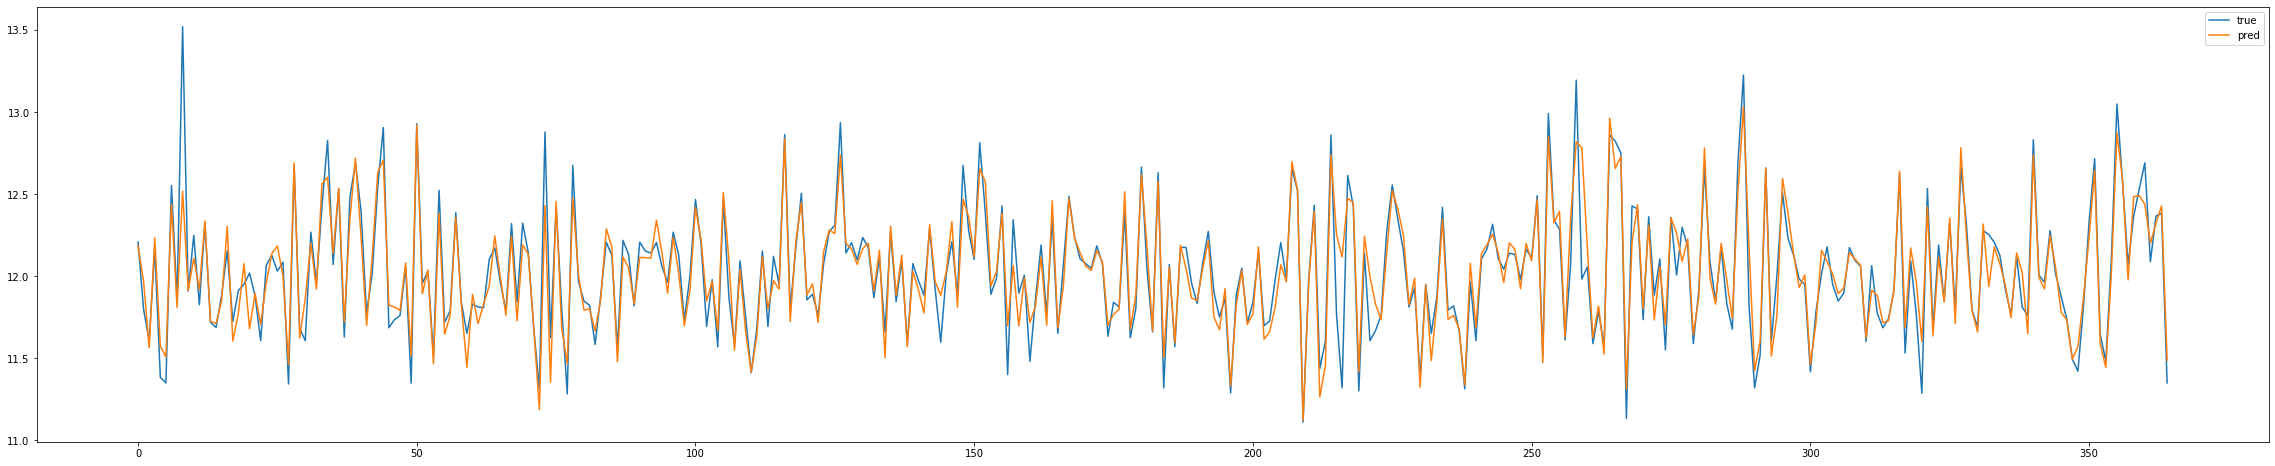

valid mean: 12.029447478464704
valid variance: 0.14871969602948648
pred mean: 12.026019078839644
pred variance: 0.12636425630007667


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(40, 8))
plt.plot(range(y_valid_log.shape[0]), y_valid_log, label='true')
plt.plot(range(y_pred_brend_2.shape[0]), y_pred_brend_2, label='pred')
plt.legend()
plt.show()
print(f'valid mean: {np.mean(y_valid_log)}')
print(f'valid variance: {np.var(y_valid_log)}')
print(f'pred mean: {np.mean(y_pred_brend_2)}')
print(f'pred variance: {np.var(y_pred_brend_2)}')

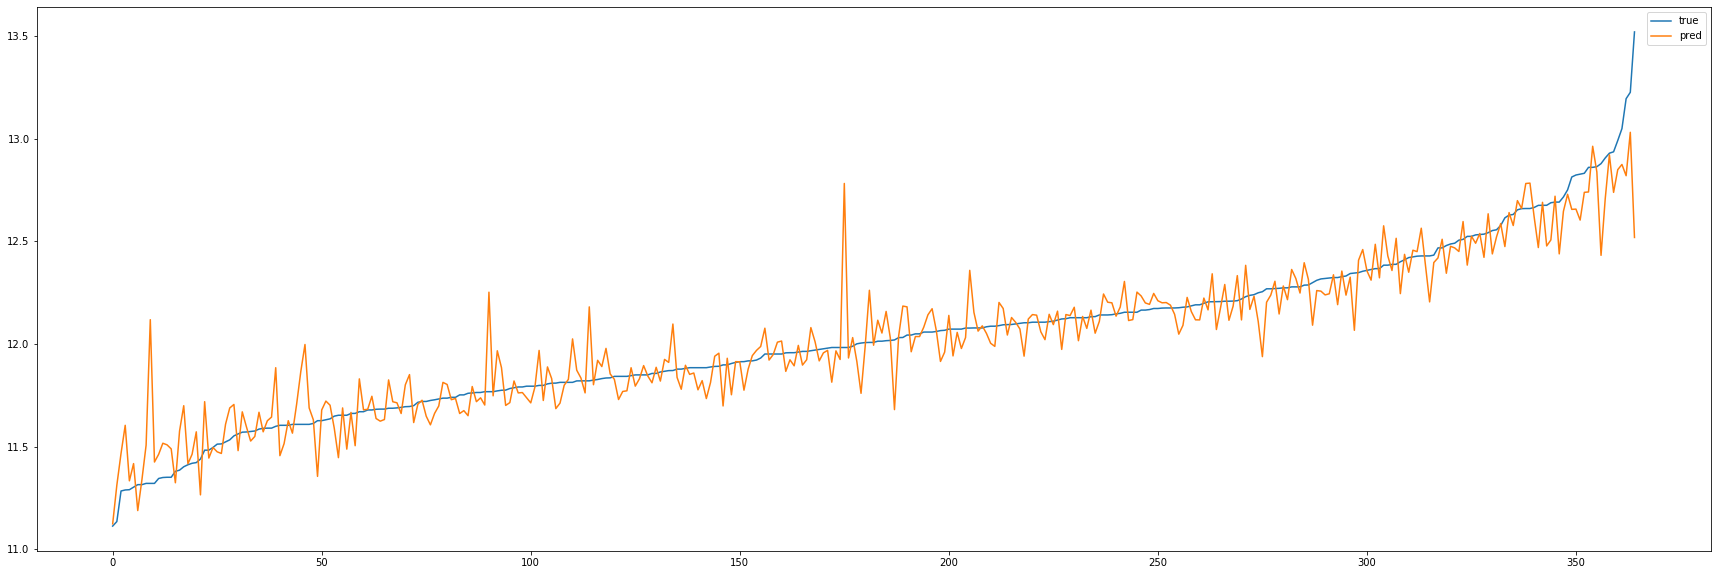

In [17]:
a = np.concatenate((y_valid_log.reshape(-1, 1), y_pred_brend_2.reshape(-1, 1)), axis=1)
b = a.tolist()
c = sorted(b, key=lambda x: x[0])
d = np.array(c)
%matplotlib inline
fig = plt.figure(figsize=(30, 10))
plt.plot(range(d[:, 0].shape[0]), d[:, 0], label='true')
plt.plot(range(d[:, 1].shape[0]), d[:, 1], label='pred')
plt.legend()
plt.show()

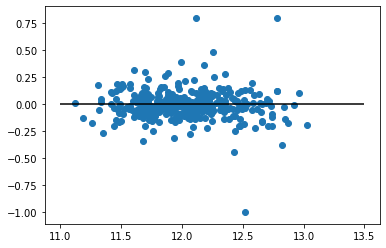

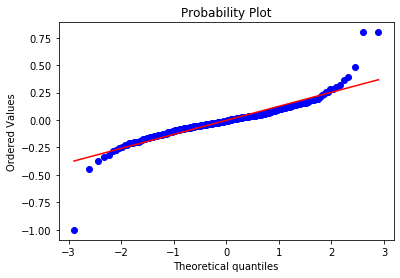

In [18]:
# 残差プロットをしてみる
%matplotlib inline
plt.scatter(y_pred_brend_2, y_pred_brend_2-y_valid_log)
plt.hlines(y=0, xmin=11, xmax=13.5)
plt.show()
# Quantile plot
import scipy.stats as stats
stats.probplot(y_pred_brend_2-y_valid_log, dist="norm", plot=plt)
plt.show()

予測結果をプロットした図を見ると、傾向としてはうまく予測できているが実際の値に比べvarianceが低そうに見える。

残差プロット・QQプロットの結果を見る限りおおむね正規分布となっており、問題はなさそう。

次はデータの前処理方法によるブレンディングを行う。

### ブレンディング検証: 3. 前処理(標準化, 対数変換)

In [19]:
# 単一モデル検証 - X:前処理なし, y:前処理なし
svr_Xyraw = SVR()
svr_Xyraw.fit(X_train, y_train)
y_pred_Xyraw = svr_Xyraw.predict(X_valid)
print(f'MSE(X=raw, y=raw): {mean_squared_error(y_valid, y_pred_Xyraw)}')
print(f'log MSE(X=raw, y=raw): {mean_squared_error(y_valid_log, np.log(y_pred_Xyraw))}')

MSE(X=raw, y=raw): 6960474524.623571
log MSE(X=raw, y=raw): 0.14961367979234103


In [20]:
# 単一モデル検証 - X:前処理なし, y:対数変換
svr_Xraw = SVR()
svr_Xraw.fit(X_train, y_train_log)
y_pred_Xraw = svr_Xraw.predict(X_valid)
print(f'MSE(X=raw, y=log): {mean_squared_error(y_valid, np.exp(y_pred_Xraw))}')
print(f'log MSE(X=raw, y=log): {mean_squared_error(y_valid_log, y_pred_Xraw)}')

MSE(X=raw, y=log): 1586471066.3383408
log MSE(X=raw, y=log): 0.03672594751644902


In [21]:
# 単一モデル検証 - X:標準化, y:前処理なし
svr_yraw = SVR()
svr_yraw.fit(X_train_std, y_train)
y_pred_yraw = svr_yraw.predict(X_valid_std)
print(f'MSE(X=std, y=raw): {mean_squared_error(y_valid, y_pred_yraw)}')
print(f'log MSE(X=std, y=raw): {mean_squared_error(y_valid_log, np.log(y_pred_yraw))}')

MSE(X=std, y=raw): 6955822472.736387
log MSE(X=std, y=raw): 0.14946080454410468


In [22]:
# 単一モデル検証 - X:標準化, y:対数変換
svr_noraw = SVR()
svr_noraw.fit(X_train_std, y_train_log)
y_pred_noraw = svr_noraw.predict(X_valid_std)
print(f'MSE(X=std, y=log): {mean_squared_error(y_valid_log, np.exp(y_pred_noraw))}')
print(f'log MSE(X=std, y=log): {mean_squared_error(y_valid_log, y_pred_noraw)}')

MSE(X=std, y=log): 35841204620.4472
log MSE(X=std, y=log): 0.026533348225285452


(1095, 18)
[0.19416659 0.28551527 0.35525042 0.41203449 0.4537169  0.487478
 0.52050593 0.55285918 0.58426531 0.61483649 0.64378943 0.67235699
 0.69942739 0.72601547 0.75188569 0.77647896 0.80080412 0.82275277]


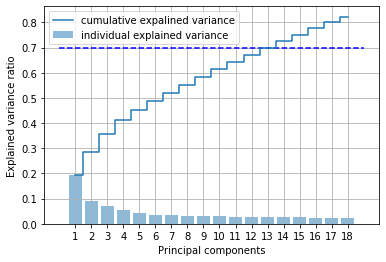

MSE(X=pca, y=log): 35756161662.62644
log MSE(X=pca, y=log): 0.026701861742370152


In [23]:
# 単一モデル検証 - PCA
from sklearn.decomposition import PCA

## 次元削減 36 to 18
pca = PCA(n_components = int(X_train_std.shape[1]/2))
pca = pca.fit(X_train_std)
X_train_pca = pca.transform(X_train_std)
print(X_train_pca.shape)

## 分散説明率
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1, X_train_pca.shape[1]+1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, X_train_pca.shape[1]+1), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(range(1, X_train_pca.shape[1]+1))
plt.hlines(0.7, 0, X_train_pca.shape[1]+1,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

# 学習, 予測
X_valid_pca = pca.transform(X_valid_std)
svr_pca = SVR()
svr_pca.fit(X_train_pca, y_train_log)
y_pred_pca = svr_pca.predict(X_valid_pca)
print(f'MSE(X=pca, y=log): {mean_squared_error(y_valid_log, np.exp(y_pred_pca))}')
print(f'log MSE(X=pca, y=log): {mean_squared_error(y_valid_log, y_pred_pca)}')

In [24]:
# ブレンディング検証: X:{前処理なし, 標準化}, y: {前処理なし, 対数変換}
w = np.array([0, 50, 0, 40, 60])
y_pred_brend_3_raw = np.concatenate((
    y_pred_Xyraw.reshape(-1, 1)*w[0],
    np.exp(y_pred_Xraw).reshape(-1, 1)*w[1],
    y_pred_yraw.reshape(-1, 1)*w[2],
    np.exp(y_pred_noraw).reshape(-1, 1)*w[3],
    np.exp(y_pred_pca).reshape(-1, 1)*w[4]
), axis=1)
y_pred_brend_3_log = np.concatenate((
    np.log(y_pred_Xyraw).reshape(-1, 1)*w[0],
    y_pred_Xraw.reshape(-1, 1)*w[1],
    np.log(y_pred_yraw).reshape(-1, 1)*w[2],
    y_pred_noraw.reshape(-1, 1)*w[3],
    y_pred_pca.reshape(-1, 1)*w[4]
), axis=1)

y_pred_brend_3_raw = np.sum(y_pred_brend_3_raw, axis=1) / np.sum(w)
y_pred_brend_3_log = np.sum(y_pred_brend_3_log, axis=1) / np.sum(w)

print('raw:')
print(y_pred_brend_3_raw[:10])
print(y_valid[:10])
print('log:')
print(y_pred_brend_3_log[:10])
print(y_valid_log[:10])
print(f'MSE(Brending 3): {mean_squared_error(y_valid, y_pred_brend_3_raw)}')
print(f'log MSE(Brending 3): {mean_squared_error(y_valid_log, y_pred_brend_3_log)}')

raw:
[204870.20552633 156393.94016719 107404.78288849 210479.13558712
 103512.7694705  107679.75870963 257997.68566841 144268.87706188
 383905.32097221 138217.43073882]
[200624 133000 110000 192000  88000  85000 282922 141000 745000 148800]
log:
[12.22972964 11.95910904 11.57855347 12.25614487 11.54514794 11.58272104
 12.45558787 11.87894145 12.60609199 11.83248507]
[12.20918779 11.79810441 11.60823564 12.16525065 11.38509209 11.35040654
 12.55292652 11.85651517 13.5211395  11.9103584 ]
MSE(Brending 3): 1340083140.378477
log MSE(Brending 3): 0.022296846334968246


前処理パターンを複数用意しブレンディングすることでやや精度を上げることができた。

目的変数の対数変換を行わなかった2パターンについては、考慮しないほうがわずかではあるが成績が良くなった。

# 【問題2】
## バギングのスクラッチ実装
バギング をスクラッチ実装し、単一モデルより精度があがる例を 最低1つ 示してください。

## バギングとは
バギングは入力データの選び方を多様化する方法です。学習データから重複を許した上でランダムに抜き出すことで、N種類のサブセット（**ブートストラップサンプル**）を作り出します。それらによってモデルをN個学習し、推定結果の平均をとります。ブレンディングと異なり、それぞれの重み付けを変えることはありません。


[sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


scikit-learnのtrain_test_splitを、shuffleパラメータをTrueにして使うことで、ランダムにデータを分割することができます。これによりブートストラップサンプルが手に入ります。


推定結果の平均をとる部分はブースティングと同様の実装になります。

今回はサブセットを**5種類**として学習を行う。

モデルは単一モデル検証で比較的精度が低かった決定木モデルを用いる。

学習データはX_train_stdの50%を用いて行う。

In [25]:
# 単一モデル検証1
X_train_bag_1, _, y_train_bag_1, _ = train_test_split(X_train_std, y_train_log, random_state=1, train_size=0.5, shuffle=True)
dtree_bag_1 = DecisionTreeRegressor()
dtree_bag_1.fit(X_train_bag_1, y_train_bag_1)
y_pred_bag_1 = dtree_bag_1.predict(X_valid_std)
print(f'MSE(bag 1): {mean_squared_error(y_valid_log, y_pred_bag_1)}')

MSE(bag 1): 0.0635637915043591


In [26]:
# 単一モデル検証2
X_train_bag_2, _, y_train_bag_2, _ = train_test_split(X_train_std, y_train_log, random_state=2, train_size=0.5, shuffle=True)
dtree_bag_2 = DecisionTreeRegressor()
dtree_bag_2.fit(X_train_bag_2, y_train_bag_2)
y_pred_bag_2 = dtree_bag_2.predict(X_valid_std)
print(f'MSE(bag 2): {mean_squared_error(y_valid_log, y_pred_bag_2)}')

MSE(bag 2): 0.051316065732072445


In [27]:
# 単一モデル検証3
X_train_bag_3, _, y_train_bag_3, _ = train_test_split(X_train_std, y_train_log, random_state=3, train_size=0.5, shuffle=True)
dtree_bag_3 = DecisionTreeRegressor()
dtree_bag_3.fit(X_train_bag_3, y_train_bag_3)
y_pred_bag_3 = dtree_bag_3.predict(X_valid_std)
print(f'MSE(bag 3): {mean_squared_error(y_valid_log, y_pred_bag_3)}')

MSE(bag 3): 0.053189035526541965


In [28]:
# 単一モデル検証4
X_train_bag_4,  _, y_train_bag_4, _ = train_test_split(X_train_std, y_train_log, random_state=4, train_size=0.5, shuffle=True)
dtree_bag_4 = DecisionTreeRegressor()
dtree_bag_4.fit(X_train_bag_4, y_train_bag_4)
y_pred_bag_4 = dtree_bag_4.predict(X_valid_std)
print(f'MSE(bag 4): {mean_squared_error(y_valid_log, y_pred_bag_4)}')

MSE(bag 4): 0.054462380637915385


In [29]:
# 単一モデル検証5
X_train_bag_5, _, y_train_bag_5, _ = train_test_split(X_train_std, y_train_log, random_state=5, train_size=0.5, shuffle=True)
dtree_bag_5 = DecisionTreeRegressor()
dtree_bag_5.fit(X_train_bag_5, y_train_bag_5)
y_pred_bag_5 = dtree_bag_5.predict(X_valid_std)
print(f'MSE(bag 5): {mean_squared_error(y_valid_log, y_pred_bag_5)}')

MSE(bag 5): 0.05404670664719454


In [30]:
# 単一モデル検証 - 全データ検証
dtree_all = DecisionTreeRegressor()
dtree_all.fit(X_train_std, y_train_log)
y_pred_all = dtree_all.predict(X_valid_std)
print(f'MSE(all data): {mean_squared_error(y_valid_log, y_pred_all)}')

MSE(all data): 0.03965338690241219


In [31]:
# ブレンディング検証: svr_bag_{1-5}
w = np.array([1, 1, 1, 1, 1])
y_pred_bag = np.concatenate((
    y_pred_bag_1.reshape(-1, 1)*w[0],
    y_pred_bag_2.reshape(-1, 1)*w[1],
    y_pred_bag_3.reshape(-1, 1)*w[2],
    y_pred_bag_4.reshape(-1, 1)*w[3],
    y_pred_bag_5.reshape(-1, 1)*w[4]
), axis=1)

y_pred_bag = np.sum(y_pred_bag, axis=1) / np.sum(w)

print(y_pred_bag[:10])
print(y_valid_log[:10])
print(f'MSE(Bagging): {mean_squared_error(y_valid_log, y_pred_bag)}')

[12.09983419 11.70807287 11.69348516 12.41249734 11.59048291 11.66424702
 12.42732738 11.6765527  12.870525   11.99923688]
[12.20918779 11.79810441 11.60823564 12.16525065 11.38509209 11.35040654
 12.55292652 11.85651517 13.5211395  11.9103584 ]
MSE(Bagging): 0.027066483338503672


バギングを用いることで、単一識別器に比べかなり精度が良くなった。

In [32]:
# 関数化
def bagging(X_train, X_valid, y_train, y_valid, n_estimators=5):
    y_preds = []
    mses = []
    models = []
    for i in range(n_estimators):
        # learning
        X_train_bag, _, y_train_bag, _ = train_test_split(X_train, y_train, random_state=i, train_size=0.5, shuffle=True)
        dtree = DecisionTreeRegressor()
        dtree.fit(X_train_bag, y_train_bag)
        
        # predict
        y_preds.append(dtree.predict(X_valid).reshape(-1, 1))
        
        # calc MSE
        mses.append(mean_squared_error(y_valid, y_preds[-1]))
        print(f'{i}, MSE: {mses[-1]}')
        
        models.append(dtree)
    # bagging
    y_pred_mean = np.mean(np.concatenate(y_preds, axis=1), axis=1)
    print(f'final MSE: {mean_squared_error(y_valid, y_pred_mean)}')
    return y_pred_mean, models

In [33]:
y_pred_bag, models = bagging(X_train_std, X_valid_std, y_train_log, y_valid_log, n_estimators=1000)

0, MSE: 0.047623303344583943
1, MSE: 0.05156948155236713
2, MSE: 0.062431592833959944
3, MSE: 0.054529079244616044
4, MSE: 0.06109331872891072
5, MSE: 0.055390373496376745
6, MSE: 0.0412813531538095
7, MSE: 0.053455059611927674
8, MSE: 0.05374453865357324
9, MSE: 0.04781951388037275
10, MSE: 0.046247191362898406
11, MSE: 0.046176677343184466
12, MSE: 0.052218665067384304
13, MSE: 0.04217878657691228
14, MSE: 0.043339195216028935
15, MSE: 0.05323003286281205
16, MSE: 0.0478397204391132
17, MSE: 0.05633551824575687
18, MSE: 0.06284556851085221
19, MSE: 0.04702295991635719
20, MSE: 0.045064212815746116
21, MSE: 0.05239609748263642
22, MSE: 0.04156770529953697
23, MSE: 0.037774504169259294
24, MSE: 0.04288705633663825
25, MSE: 0.04172884069981662
26, MSE: 0.052943818122070996
27, MSE: 0.03858034340769094
28, MSE: 0.046220172471088374
29, MSE: 0.054424117335570614
30, MSE: 0.050769136808821974
31, MSE: 0.042723713892919256
32, MSE: 0.04521497771227678
33, MSE: 0.05054681960760026
34, MSE: 0

[12.20918779 11.79810441 11.60823564 12.16525065 11.38509209]
[12.1487416  11.852642   11.54407636 12.32390901 11.40401421]
MSE: 0.018557956859222333


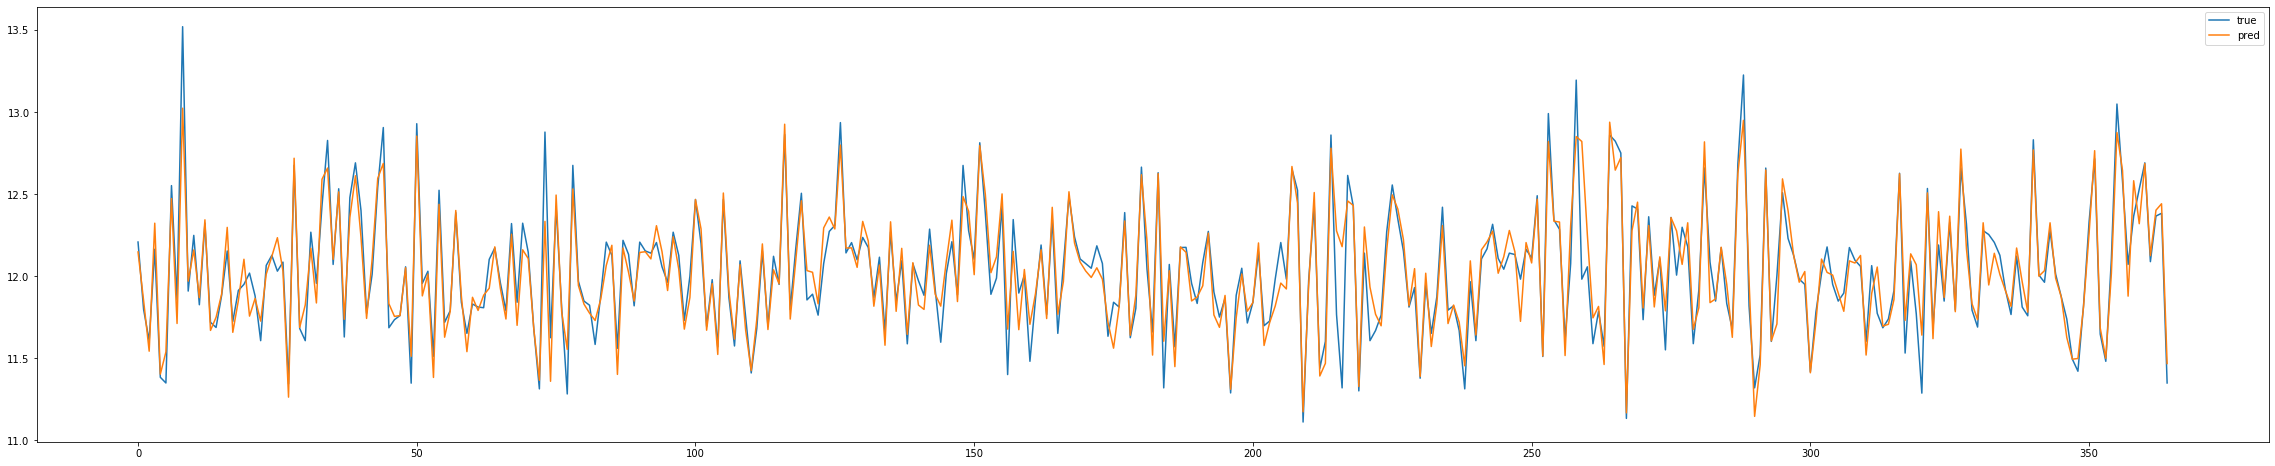

In [34]:
print(y_valid_log[:5])
print(y_pred_bag[:5])
print(f'MSE: {mean_squared_error(y_valid_log, y_pred_bag)}')
%matplotlib inline
fig = plt.figure(figsize=(40, 8))
plt.plot(range(y_valid_log.shape[0]), y_valid_log, label='true')
plt.plot(range(y_pred_bag.shape[0]), y_pred_bag, label='pred')
plt.legend()
plt.show()

In [35]:
test_df = pd.read_csv('test.csv')
X_test = test_df.select_dtypes(include='number').iloc[:, 1:].fillna(method = 'bfill').fillna(method = 'ffill').values
ids = test_df['Id'].values

X_test_std = scaler.transform(X_test)
y_test_preds = []
for i in range(len(models)):
        # predict
        y_test_preds.append(models[i].predict(X_test_std).reshape(-1, 1))
y_test_pred_mean = np.exp(np.mean(np.concatenate(y_test_preds, axis=1), axis=1))

submit_arr = np.concatenate((ids.reshape(-1, 1), y_test_pred_mean.reshape(-1, 1)), axis=1)
submit_df = pd.DataFrame(submit_arr, columns=['Id', 'SalePrice'])
submit_df['Id'] = submit_df['Id'].astype(np.int32)
display(submit_df)
submit_df.info()
submit_df.to_csv('submit.csv', index=False)
## public score: 0.15236

,Id,SalePrice
0,1461,125427.430566
1,1462,154336.624449
2,1463,177146.794008
3,1464,179914.060869
4,1465,196895.233812
...,...,...
1454,2915,81664.439077
1455,2916,85097.246012
1456,2917,159620.436905
1457,2918,111028.441713


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int32  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int32(1)
memory usage: 17.2 KB


n_estimators=1000で実装を行ったところ、単一モデルに比べて大幅な精度の改善（MSE:0.05->0.19）がみられた。

テストデータの予測に関してもsklearn実装モデルと比べ遜色ない結果を出すことができた。

# 【問題3】
## スタッキングのスクラッチ実装
**スタッキング**をスクラッチ実装し、単一モデルより精度があがる例を**最低1つ**示してください。

## スタッキングとは
スタッキングの手順は以下の通りです。最低限ステージ0とステージ1があればスタッキングは成立するため、それを実装してください。まずは$K_0=3, M_0=2$程度にします。


### 《学習時》


（ステージ0）


- 学習データを$K_0$個に分割する。
- 分割した内の$(K_0-1)$個をまとめて学習用データ、残り1個を推定用データとする組み合わせが$K_0$個作れる。
- あるモデルのインスタンスを$K_0$個用意し、異なる学習用データを使い学習する。
- それぞれの学習済みモデルに対して、使っていない残り1個の推定用データを入力し、推定値を得る。（これをブレンドデータと呼ぶ）
- さらに、異なるモデルのインスタンスも$M_0$個用意し、同様のことを行う。モデルが$M_0$個あれば、$M_0$個のブレンドデータが得られる。

（ステージn）


- ステージ$n-1$のブレンドデータを$M_{n-1}$次元の特徴量を持つ学習用データと考え、$K_n$個に分割する。以下同様である。

（ステージN）＊最後のステージ


- ステージ$N-1$の$M_{N-1}$個のブレンドデータを$M_{N-1}$次元の特徴量の入力として、1種類のモデルの学習を行う。これが最終的な推定を行うモデルとなる。

### 《推定時》


（ステージ0）


- テストデータを$K_0{\times}M_0$個の学習済みモデルに入力し、$K_0{\times}M_0$個の推定値を得る。これを$K_0$の軸で平均値を求め$M_0$次元の特徴量を持つデータを得る。（ブレンドテストと呼ぶ）

（ステージn）


- ステージ$n-1$で得たブレンドテストを$K_n{\times}M_n$個の学習済みモデルに入力し、$K_n{\times}M_n$個の推定値を得る。これを$K_n$の軸で平均値を求め$M_n$次元の特徴量を持つデータを得る。（ブレンドテストと呼ぶ）

（ステージN）＊最後のステージ


- ステージ$N-1$で得たブレンドテストを学習済みモデルに入力し、推定値を得る。

K_0=3, M_0=2で実装してみる。

- stage0: 線形回帰, SVM
- stage1: ランダムフォレスト

とする。

In [83]:
# 学習
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
kf = KFold(n_splits=3, shuffle=True, random_state=0)
## stage0
### 線形回帰 
s_00_models = []
### SVM
s_01_models = []
### ブレンドデータ ndarray(X_train_std.shape[0], M_0)
X_brend_s_0 = np.zeros((X_train_std.shape[0], 2))
y_brend_s_0 = np.zeros((X_train_std.shape[0], 1))
for i, (train_index, test_index) in enumerate(kf.split(X_train_std)):
    tmp_lr = LinearRegression()
    tmp_svr = SVR()
    #### fit
    tmp_lr.fit(X_train_std[train_index], y_train_log[train_index])
    tmp_svr.fit(X_train_std[train_index], y_train_log[train_index])
    #### save models
    s_00_models.append(tmp_linear)
    s_01_models.append(tmp_svr)
    #### predict
    pred_00 = tmp_lr.predict(X_train_std[test_index])
    pred_01 = tmp_svr.predict(X_train_std[test_index])
    tmp_pred = np.concatenate((pred_00.reshape(-1, 1), pred_01.reshape(-1, 1)), axis=1)
    if i == 0:
        X_brend_s_0 = tmp_pred
        y_brend_s_0 = y_train_log[test_index]
    else:
        X_brend_s_0 = np.concatenate((X_brend_s_0, tmp_pred), axis=0)
        y_brend_s_0 = np.concatenate((y_brend_s_0, y_train_log[test_index]), axis=0)

print(X_brend_s_0.shape)
print(y_brend_s_0.shape)
print(X_brend_s_0)
print(y_brend_s_0)

(1095, 2)
(1095,)
[[12.05522678 11.9403938 ]
 [11.68977879 11.88641407]
 [12.82439182 12.81183126]
 ...
 [11.97454783 12.0135578 ]
 [12.71175333 12.65876261]
 [11.76840922 11.84823254]]
[11.98292909 11.88448902 12.84792653 ... 11.92503512 12.72783821
 11.75978554]


In [84]:
## stage1(最終ステージ) K_1=3, M_1=1
### ランダムフォレスト
s_1_models = []

rtree = RandomForestRegressor()
rtree.fit(X_brend_s_0, y_brend_s_0)

print(y_pred_s_1.shape)
print(y_brend_s_1.shape)
print(y_pred_s_1)
print(y_brend_s_1)
print(f'MSE(stacking_train): {mean_squared_error(y_brend_s_1, y_pred_s_1)}')

(1095,)
(1095,)
[11.76324858 12.79070492 11.86829842 ... 11.59745383 12.26469937
 11.74054095]
[11.88448902 12.84792653 11.87756858 ... 11.6307085  12.52452638
 11.76756768]
MSE(stacking_train): 0.02358028854905201


In [85]:
# 予測
y_pred_s_00 = []
y_pred_s_01 = []
for model_0, model_1 in zip(s_00_models, s_01_models):
    y_pred_s_00.append(model_0.predict(X_valid_std).reshape(-1, 1))
    y_pred_s_01.append(model_1.predict(X_valid_std).reshape(-1, 1))

y_pred_s_00 = np.mean(np.concatenate(y_pred_s_00, axis=1), axis=1)
y_pred_s_01 = np.mean(np.concatenate(y_pred_s_01, axis=1), axis=1)

y_pred_s_0 = np.concatenate((y_pred_s_00.reshape(-1, 1), y_pred_s_01.reshape(-1, 1)), axis=1)

y_pred_s_1 = s_1_models[0].predict(y_pred_s_0)

print(f'MSE(stacking_valid): {mean_squared_error(y_valid_log, y_pred_s_1)}')

MSE(stacking_valid): 0.01939073779752354


In [86]:
# 単一モデル比較
lr = LinearRegression()
svr = SVR()
rtree = RandomForestRegressor()
lr.fit(X_train_std, y_train_log)
svr.fit(X_train_std, y_train_log)
rtree.fit(X_train_std, y_train_log)
y_pred_lr = lr.predict(X_valid_std)
y_pred_svr = svr.predict(X_valid_std)
y_pred_rtree = rtree.predict(X_valid_std)
print(f'MSE(LinearRegression): {mean_squared_error(y_valid_log, y_pred_lr)}')
print(f'MSE(SVR): {mean_squared_error(y_valid_log, y_pred_svr)}')
print(f'MSE(RandomForestRegressor): {mean_squared_error(y_valid_log, y_pred_rtree)}')

MSE(LinearRegression): 0.03629917716266756
MSE(SVR): 0.026533348225285452
MSE(RandomForestRegressor): 0.01777822654188561


線形回帰とSVMに対しては大きく精度を上げることができたが、ランダムフォレストに対しては逆に精度が下がる結果となった。

K, Mの値を増やすことで精度の向上を試みる。

**使用検討モデル**
- 線形回帰
- SVM(多項式カーネル)
- SVM(rbfカーネル)
- 決定木
- ランダムフォレスト
- LightGBM

In [208]:
import lightgbm as lgb
import copy
import time
class ScratchStackingRegrssor():
    """
    スタッキングのスクラッチ実装(3層)

    Parameters
    ----------
    k : int
      fold数
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.stage
        一番最初の学習済みステージの参照を格納する
    """
    def __init__(self, k, verbose=False):
        # ハイパーパラメータを属性として記録
        self.k = k
        self.verbose = verbose
    
    def __str__(self):
        return self.stage.__str__()

    class BaseStage():
        """
        複数のベースモデルを持ったステージ

        Parameters
        ----------
        verbose : bool
            学習過程を出力する場合はTrue
        k : int
            訓練データのfold数
        next_ : BaseStage, MetaStage
            次のステージへの参照
        *args :　tuple(instance)
            モデル群

        Attributes
        ----------
        self.models : list
            学習済みモデルを格納する
        """
        def __init__(self, verbose, k, next_, *args):
            self.verbose = verbose
            self.k = k
            self.next_ = next_
            self.models_class = args

        def __str__(self):
            tmp_str = '- - - - -\n'
            for x in self.models:
                for m in x:
                    tmp_str += f'{type(m)}:{id(m)}  '
                tmp_str += '\n'
            
            return tmp_str + self.next_.__str__()

        def fit(self, X, y):
            """
            ベースモデルによる学習

            Parameters
            ----------
            X : ndarray(n_samples, n_features)
                訓練データの特徴量
            y : ndarray(n_samples, )
                訓練データの正解値
            """
            # 次の階層に渡す特徴量と正解値
            X_new = []
            y_new = []
            # モデルの保存先listを作成
            self.models = []

            kf = KFold(n_splits=self.k, shuffle=True, random_state=0)
            
            for i, (train_index, test_index) in enumerate(kf.split(X)):
                tmp_pred = []
                tmp_models = []
                # fit each models
                for model_class in self.models_class:
                    ## make instance
                    model = copy.deepcopy(model_class)
                    ## fit
                    model.fit(X[train_index], y[train_index])
                    ## save models
                    tmp_models.append(model)
                    ## predict
                    tmp_pred.append(model.predict(X[test_index]))
                # save models
                self.models.append(tmp_models)
                # reshape prediction
                tmp_pred = [x.reshape(-1, 1) for x in tmp_pred]
                # append data 
                X_new.append(np.concatenate(tmp_pred, axis=1))
                y_new.append(y[test_index])
                
                if self.verbose:
                    print(f'Finish learning fold {i+1}')

            if self.verbose:
                print(f'Finish learning base model')

            # make array for next stage
            X_new_arr = np.concatenate(X_new, axis=0)
            y_new_arr = np.concatenate(y_new, axis=0)

            # go next stage
            self.next_.fit(X_new_arr, y_new_arr)
        
        def predict(self, X):
            """
            推論を行う

            Parameters
            ----------
            X : ndarray(n_samples, n_features)
                訓練データの特徴量
            Return
            ----------
            ndarray(n_samples, )
                予測値
            """
            # new features
            X_new = []
            
            for model_num in range(len(self.models_class)):
                for i in range(len(self.models)):
                    # prediction
                    y_pred_tmp = self.models[i][model_num].predict(X)
                    if i == 0:
                        y_pred = y_pred_tmp.reshape(-1, 1)
                    else:
                        y_pred = np.concatenate((y_pred, y_pred_tmp.reshape(-1, 1)), axis=1)
                # get mean
                X_new.append(np.mean(y_pred, axis=1))
            
            # get new X for next stage
            X_new = [x.reshape(-1, 1) for x in X_new]
            X_new_arr = np.concatenate(X_new, axis=1)

            return self.next_.predict(X_new_arr)

    class MetaStage():
        """
        メタモデルを持ったステージ

        Parameters
        ----------
        verbose : bool
            学習過程を出力する場合はTrue
        model_class :　instance
            モデル

        Attributes
        ----------
        self.model 
            学習済みモデルを格納する
        """
        def __init__(self, verbose, model_class):
            self.verbose = verbose
            self.model_class = model_class

        def __str__(self):
            return f'- - - - -\n{type(self.model)}:{id(self.model)}\n- - - - -'     

        def fit(self, X, y):
            """
            メタモデルによる学習

            Parameters
            ----------
            X : ndarray(n_samples, n_features)
                訓練データの特徴量
            y : ndarray(n_samples, )
                訓練データの正解値
            """
            self.model = copy.deepcopy(self.model_class)
            self.model.fit(X, y)
            if self.verbose:
                print('Finish learning meta model')

        def predict(self, X):
            """
            推論を行う

            Parameters
            ----------
            X : ndarray(n_samples, n_features)
                訓練データの特徴量
            Return
            ----------
            ndarray(n_samples, )
                予測値
            """
            return self.model.predict(X)

    def fit(self, X, y):
        """
        stackingによる学習を実行

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : ndarray(n_samples, )
            訓練データの正解値
        """
        stage_1 = self.MetaStage(self.verbose,
                    LinearRegression())
        stage_0 = self.BaseStage(self.verbose, self.k, stage_1,
                    SVR(kernel='poly'),
                    SVR(kernel='linear'),
                    LinearRegression(),
                    RandomForestRegressor())

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print('start learning')
        
        start_time = time.time()
        
        ## learn
        stage_0.fit(X, y)
        ## save stage
        self.stage = stage_0
        
        end_time = time.time()
        elapsed_time = end_time - start_time

        print(f'Done! elapsed time: {elapsed_time:.5f}s')
    
    def predict(self, X):
        """
        推論を実行

        Return
        ----------
          ndarray(n_samples, )
            予測値
        """
        return self.stage.predict(X)

In [209]:
stack_ = ScratchStackingRegrssor(k=10, verbose=True)
stack_.fit(X_train_std, y_train_log)

start learning
Finish learning fold 1
Finish learning fold 2
Finish learning fold 3
Finish learning fold 4
Finish learning fold 5
Finish learning fold 6
Finish learning fold 7
Finish learning fold 8
Finish learning fold 9
Finish learning fold 10
Finish learning base model
Finish learning meta model
Done! elapsed time: 14.60178s


In [181]:
# 単一モデル検証
y_pred_dtree = DecisionTreeRegressor().fit(X_train_std, y_train_log).predict(X_valid_std)
y_pred_rforest = RandomForestRegressor().fit(X_train_std, y_train_log).predict(X_valid_std)
y_pred_svr_poly = SVR(kernel='poly').fit(X_train_std, y_train_log).predict(X_valid_std)
y_pred_svr_rbf = SVR(kernel='rbf').fit(X_train_std, y_train_log).predict(X_valid_std)
y_pred_lr = LinearRegression().fit(X_train_std, y_train_log).predict(X_valid_std)
y_pred_lgb = lgb.LGBMRegressor().fit(X_train_std, y_train_log).predict(X_valid_std)
print(f'MSE(DecisionTree): {mean_squared_error(y_valid_log, y_pred_dtree)}')
print(f'MSE(RandomForest): {mean_squared_error(y_valid_log, y_pred_rforest)}')
print(f'MSE(SVR-poly): {mean_squared_error(y_valid_log, y_pred_svr_poly)}')
print(f'MSE(SVR-rbf): {mean_squared_error(y_valid_log, y_pred_svr_rbf)}')
print(f'MSE(LinearRegression): {mean_squared_error(y_valid_log, y_pred_lr)}')
print(f'MSE(LightGBM): {mean_squared_error(y_valid_log, y_pred_lgb)}')

MSE(DecisionTree): 0.03849089713824644
MSE(RandomForest): 0.018466247536488383
MSE(SVR-poly): 1.4341072723236798
MSE(SVR-rbf): 0.026533348225285452
MSE(LinearRegression): 0.03629917716266756
MSE(LightGBM): 0.01777903605565419


In [210]:
y_pred = stack_.predict(X_valid_std)
print(y_pred[:5])
print(y_valid_log[:5])
print(f'MSE(stacking_valid): {mean_squared_error(y_valid_log, y_pred)}')
print(stack_)

[12.27438853 11.90860218 11.55809838 12.29974208 11.50546608]
[12.20918779 11.79810441 11.60823564 12.16525065 11.38509209]
MSE(stacking_valid): 0.01530316325672085
- - - - -
<class 'sklearn.svm._classes.SVR'>:1532292779336  <class 'sklearn.svm._classes.SVR'>:1532292778504  <class 'sklearn.linear_model._base.LinearRegression'>:1532292777864  <class 'sklearn.ensemble._forest.RandomForestRegressor'>:1532293125832  
<class 'sklearn.svm._classes.SVR'>:1532293160648  <class 'sklearn.svm._classes.SVR'>:1532293160200  <class 'sklearn.linear_model._base.LinearRegression'>:1532293159304  <class 'sklearn.ensemble._forest.RandomForestRegressor'>:1532293160264  
<class 'sklearn.svm._classes.SVR'>:1532293209096  <class 'sklearn.svm._classes.SVR'>:1532293209416  <class 'sklearn.linear_model._base.LinearRegression'>:1532292751880  <class 'sklearn.ensemble._forest.RandomForestRegressor'>:1532292754760  
<class 'sklearn.svm._classes.SVR'>:1532292729288  <class 'sklearn.svm._classes.SVR'>:1532292729032 

In [211]:
test_df = pd.read_csv('test.csv')
X_test = test_df.select_dtypes(include='number').iloc[:, 1:].fillna(method = 'bfill').fillna(method = 'ffill').values
ids = test_df['Id'].values

X_test_std = scaler.transform(X_test)
y_test_pred = np.exp(stack_.predict(X_test_std))

submit_arr = np.concatenate((ids.reshape(-1, 1), y_test_pred.reshape(-1, 1)), axis=1)
submit_df = pd.DataFrame(submit_arr, columns=['Id', 'SalePrice'])
submit_df['Id'] = submit_df['Id'].astype(np.int32)
display(submit_df)
submit_df.info()
submit_df.to_csv('submit2.csv', index=False)
## public score: 0.13812

,Id,SalePrice
0,1461,122536.612240
1,1462,143721.186260
2,1463,175501.216483
3,1464,193037.184882
4,1465,187895.707705
...,...,...
1454,2915,89619.747596
1455,2916,90329.908968
1456,2917,179325.944905
1457,2918,110641.376392


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int32  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int32(1)
memory usage: 17.2 KB


2層スタッキングを実装し、K=\[10, 10\], M=\[4, 1\]

モデルは\[SVM(多項式カーネル), SVM(線形カーネル), 線形回帰, ランダムフォレスト\] -> \[線形回帰\]とすると、どの使用検討モデルと比べてもよい精度を出すことが出来た。